In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/ZefanyaOkta/dataset/main/data_clustering.csv")
df = df.iloc[1: , :]
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil


In [4]:
# drop nama daerah karena merupakan ID, tidak berpengaruh
df.drop(columns="Nama Daerah", inplace=True)

In [17]:
df.drop(df[df['Harga Penawaran (dari Owner)'] == " "].index, inplace = True)
df.drop(df[df['Harga Penawaran (dari Owner)'] == ""].index, inplace = True)

In [5]:
df.isna().sum()

Area Category                      0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [18]:
#Fill the Empty Values

df["Jumlah Kamar Mandi"] = df['Jumlah Kamar Mandi'].fillna(0)
df["Tingkat/Lantai "] = df['Tingkat/Lantai '].fillna(0)
df["Arah Hadap Rumah"] = df['Arah Hadap Rumah'].fillna("Barat")
df["Posisi Rumah"] = df['Posisi Rumah'].fillna("Standard")
df["Lebar Jalan Depan Rumah (ROW)"] = df['Lebar Jalan Depan Rumah (ROW)'].fillna("> 2 Mobil")
df

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
303,3,47.0,34.0,2.0,1.0,1.0,450000000,0,3,2,2
304,2,300.0,212.0,4.0,4.0,1.0,5250000000,0,1,2,2
305,1,102.0,156.0,4.0,2.0,2.0,1950000000,0,1,2,0
306,3,98.0,170.0,4.0,3.0,2.0,1550000000,0,0,2,2


In [14]:
df.isna().sum()

Area Category                    0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [19]:
le = LabelEncoder()
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
303,3,47.0,34.0,2.0,1.0,1.0,450000000,0,3,2,2
304,2,300.0,212.0,4.0,4.0,1.0,5250000000,0,1,2,2
305,1,102.0,156.0,4.0,2.0,2.0,1950000000,0,1,2,0
306,3,98.0,170.0,4.0,3.0,2.0,1550000000,0,0,2,2


In [20]:
standard_sc = StandardScaler()
X = df
standard = pd.DataFrame(standard_sc.fit_transform(X),columns=X.columns)
scaled_features = standard_sc.fit(df.to_numpy())

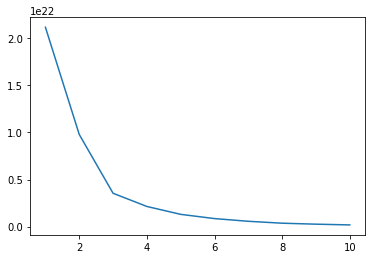

In [21]:
# K-Means Clustering
# set the parameter for evaluating K
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

wcss = []
for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

In [28]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("The best k for your model is ",findknee.elbow)

The best k for your model is  3


In [29]:
km_model = KMeans(n_clusters = findknee.elbow, random_state=1)
y_kmeans = km_model.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
from sklearn.cluster import AgglomerativeClustering
threecl = AgglomerativeClustering(3)
cls = threecl.fit_predict(X)
df['Cluster'] = cls
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1,2
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0,2
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0,2
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0,2
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0,1


In [31]:
#Tampilkan dalam bentuk dataframe kesimpulan dari cluster
df["Cluster"] = cls

df.groupby("Cluster").agg(Area_Category = ('Area Category', pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Jumlah_Kamar=('Jumlah Kamar', pd.Series.mode),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                 Tingkat=('Tingkat/Lantai ', pd.Series.mode),
                                 Terjual_Belum	=('Terjual/Belum', pd.Series.mode),
                                 Arah_Hadap_Rumah	 = ('Arah Hadap Rumah', pd.Series.mode),
                                 Posisi_Rumah	=('Posisi Rumah', pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah=('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                 count=("Cluster", 'count'))

,Area_Category,Luas_Tanah,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,count
Cluster,,,,,,,,,,
0,2,836.250000,7.0,5.0,2.0,0,0,2,2,4
1,1,530.940000,5.0,5.0,2.0,0,3,2,2,50
2,3,157.099206,4.0,4.0,2.0,0,0,2,2,252


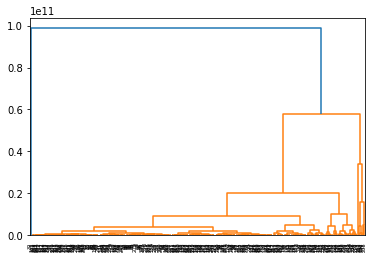

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='complete'))
plt.show()

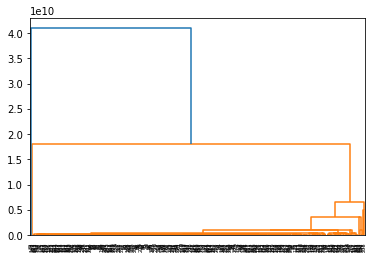

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='single'))
plt.show()

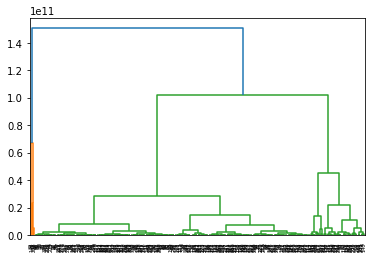

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='ward'))
plt.show()

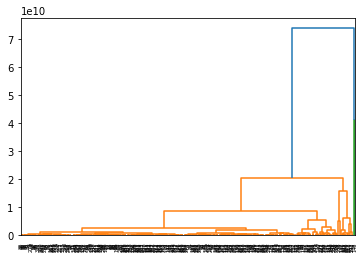

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='average'))
plt.show()

In [36]:
# Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
hie = hc.fit_predict(X)
df['Cluster'] = hie
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1,2
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0,2
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0,2
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0,2
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0,2


In [37]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
hie = hc.fit_predict(X)
df['Cluster'] = hie
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1,2
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0,2
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0,2
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0,2
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0,1


In [38]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')
hie = hc.fit_predict(X)
df['Cluster'] = hie
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1,0
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0,0
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0,0


In [39]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='single')
hie = hc.fit_predict(X)
df['Cluster'] = hie
df.head(5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
1,0,30.0,60.0,2.0,1.0,2.0,287799000,0,0,2,1,0
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0,0
3,2,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0,0
4,1,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0,0
5,1,450.0,530.0,5.0,6.0,2.0,10800000000,0,0,2,0,0


In [40]:
#Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas
df["Cluster"] = hie

df.groupby("Cluster").agg(Area_Category = ('Area Category', pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Jumlah_Kamar=('Jumlah Kamar', pd.Series.mode),
                                 Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                 Tingkat=('Tingkat/Lantai ', pd.Series.mode),
                                 Terjual_Belum	=('Terjual/Belum', pd.Series.mode),
                                 Arah_Hadap_Rumah	 = ('Arah Hadap Rumah', pd.Series.mode),
                                 Posisi_Rumah	=('Posisi Rumah', pd.Series.mode),
                                 Lebar_Jalan_Depan_Rumah=('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                 count=("Cluster", 'count'))

,Area_Category,Luas_Tanah,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,count
Cluster,,,,,,,,,,
0,3,223.621711,4.0,3.0,2.0,0,0,2,2,304
1,3,600.000000,7.0,5.0,1.0,0,0,2,0,1
2,2,900.000000,6.0,5.0,2.0,0,0,3,2,1
